# Usage

The `superblockify` package works out of the box, meaning no further downloads are
necessary. Maps are downloaded from the OpenStreetMap API and population data is
downloaded from the [GHSL-POP 2023](https://ghsl.jrc.ec.europa.eu/ghs_pop2023.php)
dataset. Only tiles needed are being cached in the `data/ghsl` folder.

As example, we will try to partition the French city of Lyon with the
`ResidentialPartitioner` class. Afterward we will save the results to a geopackage
file that can easily be opened and edited in QGIS.

First, import the package.

In [2]:
import superblockify as sb

# sb.config.set_log_level("DEBUG")   # set to see debug logs
sb.config.Config.FULL_RASTER = None  # set if you own the full ghsl raster 
# (GHS_POP_E2025_GLOBE_R2023A_54009_100_V1_0.tif)
# otherwise the package will automatically download the needed tiles

2024-04-16 15:02:10,377 |     INFO | __init__.py:11 | superblockify version 1.0.0rc5


## Initialization

For this example we will use the `ResidentialPartitioner` class.
It is a class that partitions a city into superblocks based on the residential
street tags in OpenStreetMap.
First, we initialize the partitioner with the city name and a search string.

In [3]:
part = sb.ResidentialPartitioner(
    name="Scheveningen_test", city_name="Scheveningen", search_str="Scheveningen, NL",
    unit="time",  # "time", "distance", any other edge attribute, or None to count edges
)

2024-04-16 15:02:13,587 |     INFO | utils.py:261 | Highway counts (type, count, proportion): 
                             count  proportion
highway                                       
residential                   1831    0.799214
secondary                      253    0.110432
tertiary                       113    0.049323
living_street                   63    0.027499
unclassified                    24    0.010476
[unclassified, residential]      5    0.002182
secondary_link                   1    0.000436
trunk                            1    0.000436
2024-04-16 15:02:13,590 |     INFO | utils.py:291 | Graph stats: 
                                             0
Number of nodes                            996
Number of edges                           2303
Average degree                        4.624498
Circuity average                       1.03946
Street orientation order              0.077442
Date created               2024-04-16 14:15:48
Projection                          EPSG

This will download the map of Lyon, preprocess it, output some statistics
and store it in the `data/graphs` folder for use later.
Any other partitioner for Scheveningen, given the same `city_name`, will use the same
preprocessed, locally stored map.
Population tiles are cached in the `data/ghsl` folder (if not using the full raster).

## Partitioning

Next, we will show the quickest way to partition the city and calculate the metrics
all in one go.

2024-04-16 15:02:44,123 |     INFO | checks.py:87 | The partitioning Scheveningen_test is valid.
2024-04-16 15:02:44,124 |     INFO | plot.py:42 | Plotting partitions graph for Scheveningen_test with attribute `residential`


/home/carlsonb/micromamba/envs/sb_env/lib/python3.12/site-packages/osmnx/plot.py:248: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


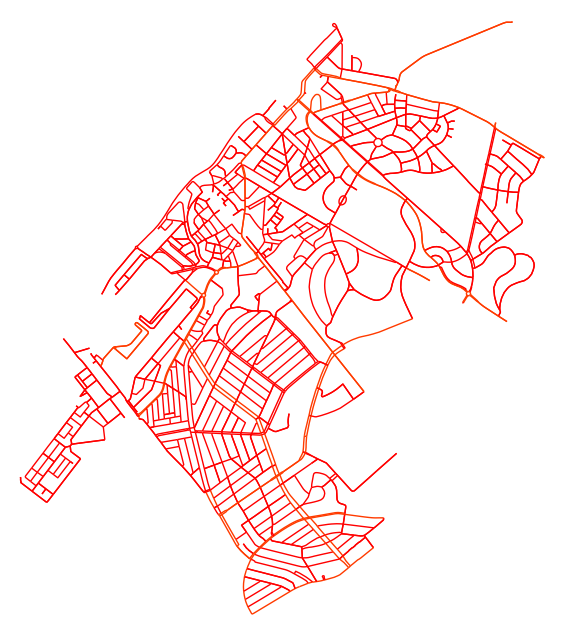

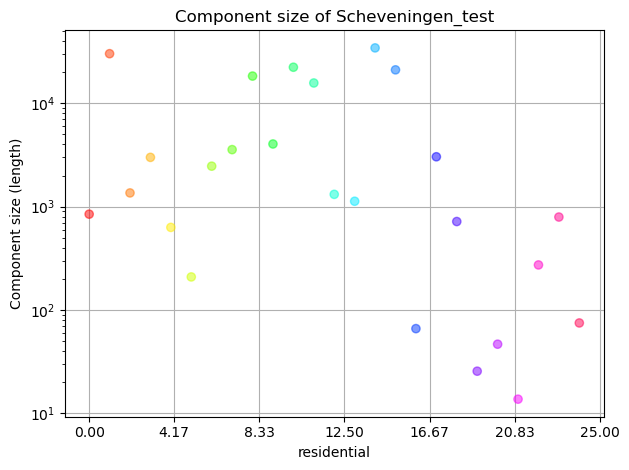

2024-04-16 15:02:46,153 |     INFO | plot.py:196 | Plotting component size rank for Scheveningen_test with attribute `residential`


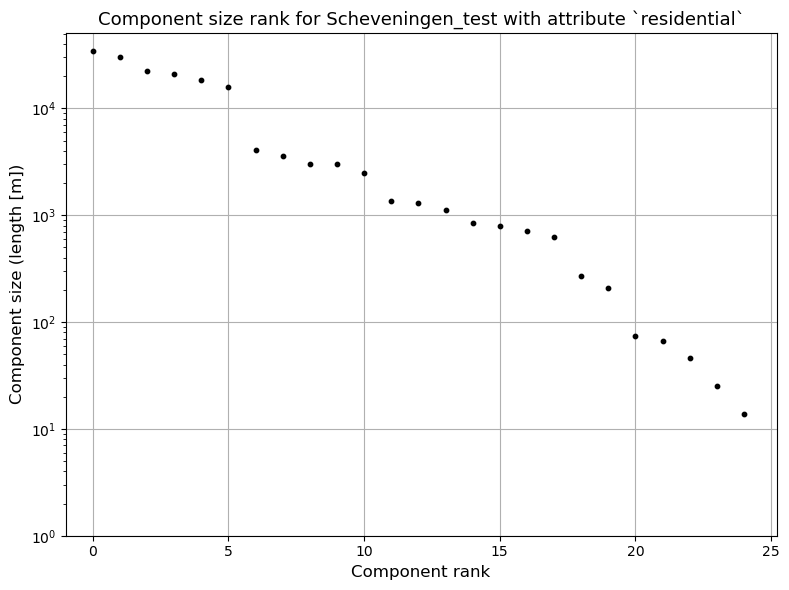

2024-04-16 15:02:46,648 |     INFO | plot.py:93 | Plotting component graph for Scheveningen_test with attribute `residential`


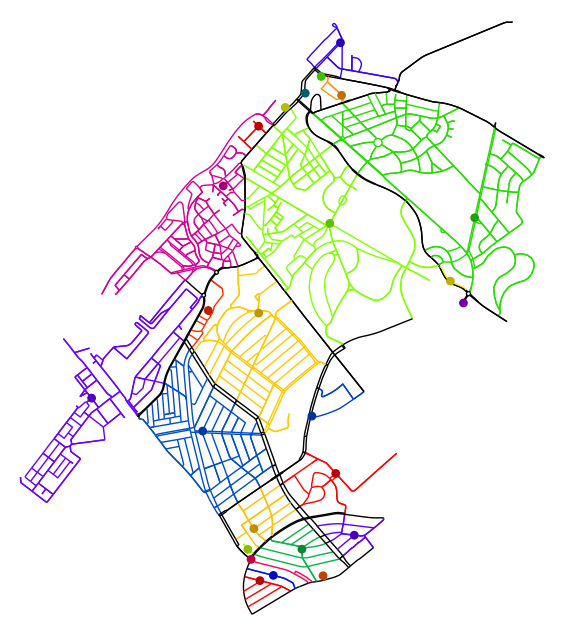

2024-04-16 15:02:47,100 |     INFO | base.py:337 | Calculating metrics for Scheveningen_test


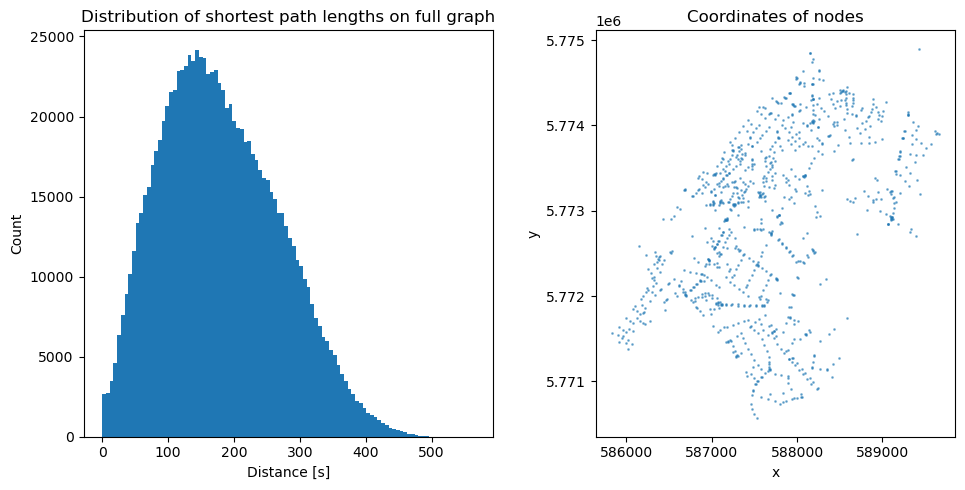

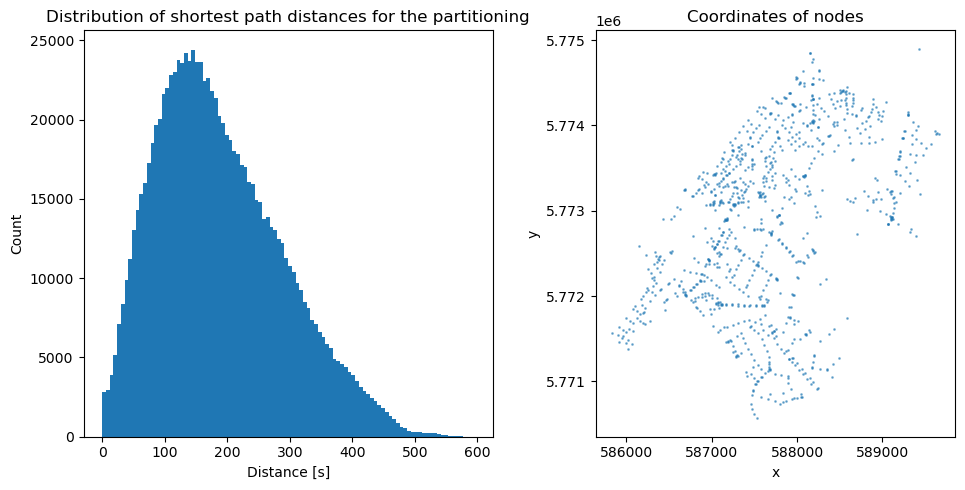

/home/carlsonb/cloud/sciebo/Physics/22_23-MA_Thesis/Code/Superblockify/superblockify/metrics/metric.py:385: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/carlsonb/cloud/sciebo/Physics/22_23-MA_Thesis/Code/Superblockify/superblockify/metrics/metric.py:395: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/carlsonb/cloud/sciebo/Physics/22_23-MA_Thesis/Code/Superblockify/superblockify/metrics/metric.py:404: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/carlsonb/micromamba/envs/sb_env/lib/python3.12/site-packages/osmnx/plot.py:248: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

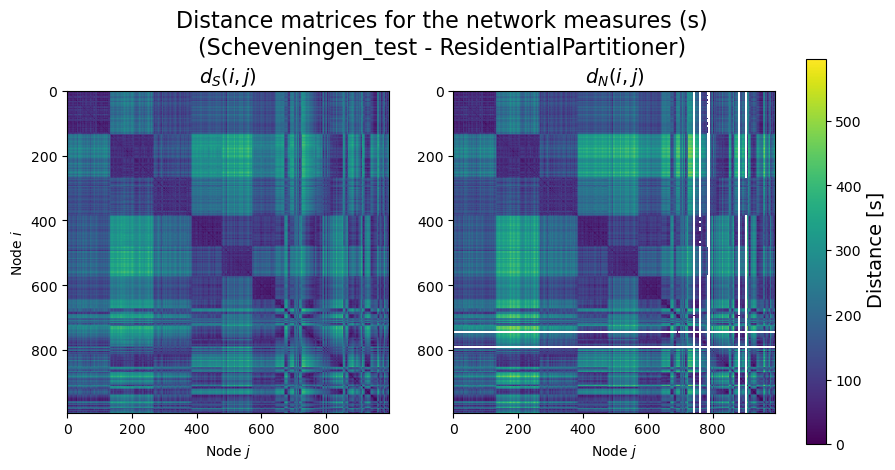

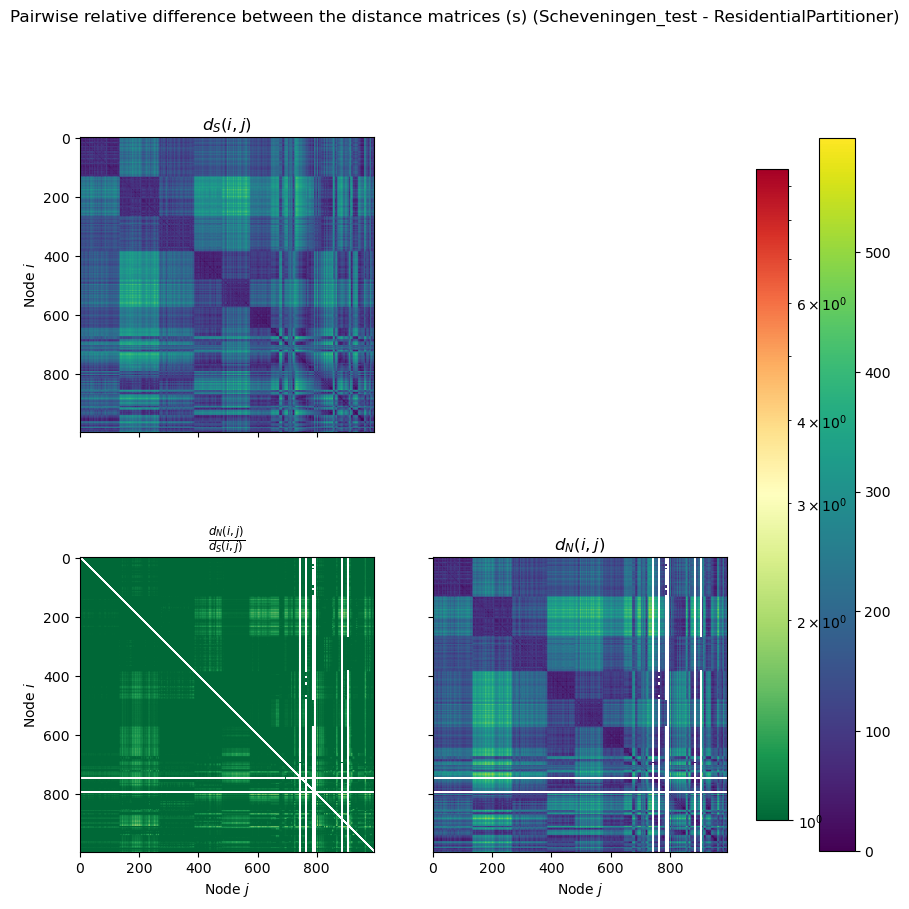

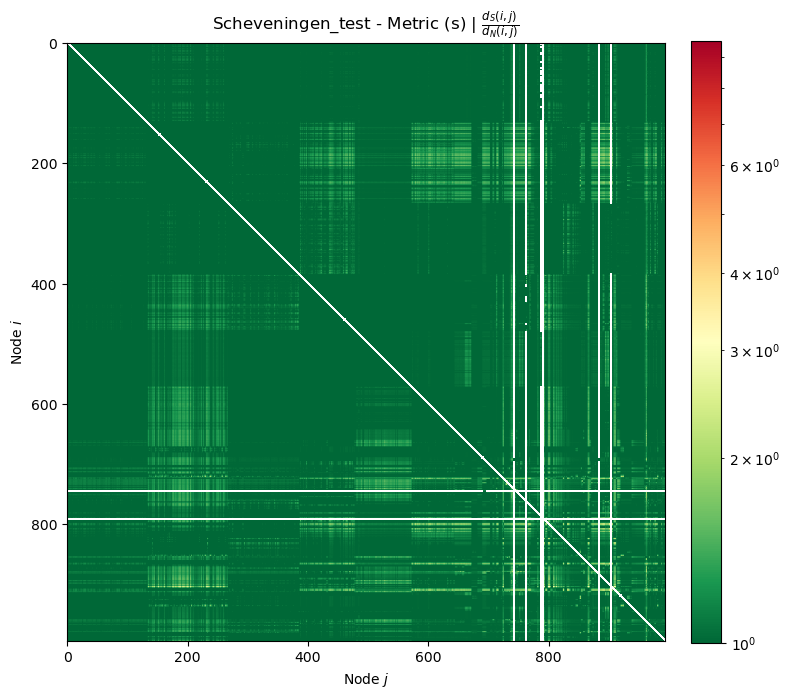

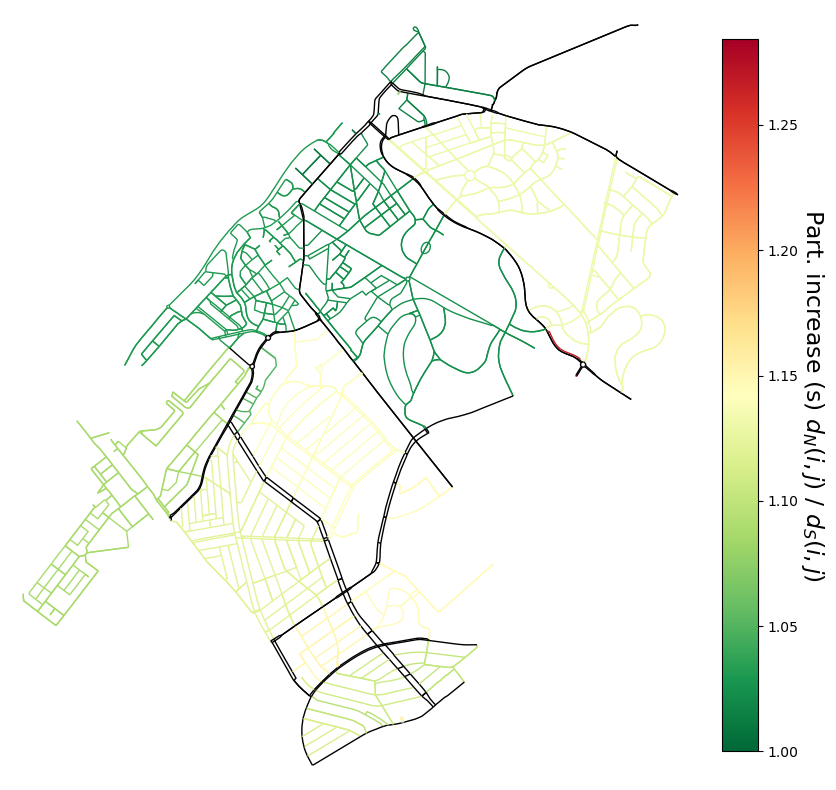

/home/carlsonb/micromamba/envs/sb_env/lib/python3.12/site-packages/osmnx/plot.py:248: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(


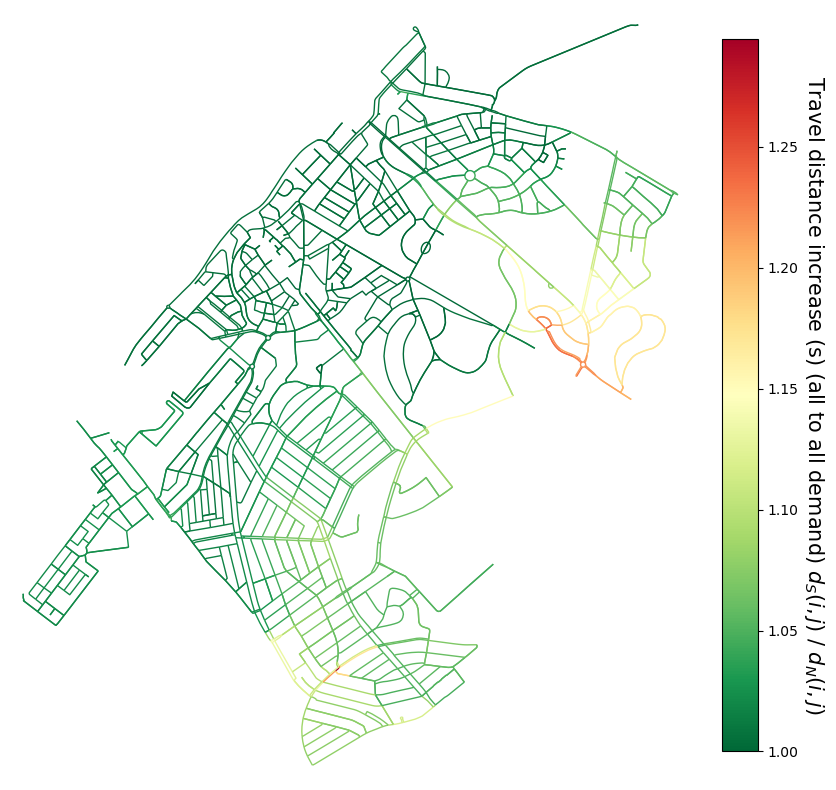

/home/carlsonb/micromamba/envs/sb_env/lib/python3.12/site-packages/osmnx/convert.py:381: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])
/home/carlsonb/micromamba/envs/sb_env/lib/python3.12/site-packages/osmnx/convert.py:381: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])
/home/carlsonb/micromamba/envs/sb_env/lib/python3.12/site-packages/osmnx/convert.py:381: FutureWarning: <class 'geopandas.array.GeometryArray'>._reduce will require a `keepdims` parameter in the future
  dupes = edges[mask].dropna(subset=["geometry"])


In [4]:
part.run(
    calculate_metrics=True,  # set to False if you are not interested in metrics
    make_plots=True,  # set to False if you are not interested in plots
    replace_max_speeds=False,  # set to true to overwrite the OSM speed limits
    # -> with 15 km/h inside LTNs and 50 km/h outside
    # If the approach has specific parameters, you can set them here
)

As you see, this partitions the city and shows the relative increase of the distance metric.
All shown plots are saved as pdf to the `data/results/Scheveningen_test` folder.

It is possible to save and load a partitioner object to continue the work later.

In [5]:
# part.save()
# part.load("Scheveningen_test")

The most illustrative and interactive way to view the results is to save them to a
geopackage file. This file can be opened in [QGIS](https://www.qgis.org/en/site/) and edited further.

In [6]:
sb.save_to_gpkg(part, save_path=None)

2024-04-16 15:09:00,135 |     INFO | utils.py:100 | Using components attribute to save LTNs to geodatapackage /home/carlsonb/cloud/sciebo/Physics/22_23-MA_Thesis/Code/Superblockify/docs/data/results/Scheveningen_test/Scheveningen_test.gpkg
2024-04-16 15:09:00,238 |     INFO | utils.py:144 | Node attributes: Index(['y', 'x', 'street_count', 'lon', 'lat', 'node_betweenness_normal',
       'node_betweenness_length', 'node_betweenness_linear',
       'node_betweenness_normal_restricted',
       'node_betweenness_length_restricted',
       'node_betweenness_linear_restricted', 'representative_node_name',
       'split', 'geometry'],
      dtype='object')
2024-04-16 15:09:00,238 |     INFO | utils.py:145 | Edge attributes: Index(['osmid', 'highway', 'length', 'bearing', 'speed_kph', 'travel_time',
       'population', 'area', 'cell_id', 'residential',
       'travel_time_restricted', 'component_name', 'edge_betweenness_normal',
       'edge_betweenness_length', 'edge_betweenness_linear',
   

This will save the partitioning results to `data/results/Scheveningen_test/Scheveningen_test.gpkg`.
If you calculated the metrics before, they will be available in the layers, for each 
LTN. This includes more metrics than shown in the plots earlier.
The name of the components is saved into a "classification" edge 
attribute. The sparse graph is saved with the value "SPARSE" into the 
"classification" edge attribute.

To learn more about the inner workings and background of the package, please
see the next Reference section. Otherwise, you can also check out the
[API documentation](api/index)

## FAQ

### Can I export the plots to another format?

Yes, you can export the plots to any format supported by matplotlib.
Just change the `PLOT_SUFFIX` in the `Config` class to the desired format.

In [7]:
sb.config.Config.PLOT_SUFFIX = "png"  # or "svg", "pdf", etc.

### The downloaded city is too big/small/not the right city, can I change this?

The deciding string for the area to download is the `search_str`.
Finding a fitting OSM area is via the Nominatim API.
If you want to see your area before downloading, use
the [Nominatim Search](https://nominatim.openstreetmap.org/ui/search.html).
It helps to be more specific, e.g. "Lyon, France" instead of just "Lyon".
Otherwise, OSM relations IDs, e.g. `R120965`, can be used.

To re-download the map, pass `reload_graph=True` when initializing the partitioner.

### The LTNs look too big/small/random when using the `ResidentialPartitioner`, why is that?

The `ResidentialPartitioner` uses the residential street tags to find the LTNs.
OSM data quality and the way streets are tagged varies, this is reflected for this approach.
The `BetweennessPartitioner` tries to combat this by using the betweenness centrality
of the streets, not the tags. Try this approach if the LTNs are not satisfactory.


In [ ]:
part = sb.BetweennessPartitioner(
    name="Scheveningen_test_betweenness", city_name="Scheveningen",
    search_str="Scheveningen, NL",
    percentile=85.0,  # aimed percentage of streets for LTNs
    scaling="normal",  # type of scaling for the betweenness centrality:
    # "normal", "length", "linear"
    max_range=None  # maximum range of the betweenness centrality, in meters, e.g. 3500
)

### My country has another maximum speed limit, can I change this?

When calculating the metrics and using `replace_max_speeds=True`,
the maximum speed limits are set to 15 km/h inside Low Traffic Neighbourhoods (LTNs)
and 50 km/h outside of them. If you want to change these values, you can do so
by setting the `V_MAX_LTN` and `V_MAX_SPARSE` attributes in the `Config` class.

In [13]:
sb.config.Config.V_MAX_LTN = 30  # km/h
sb.config.Config.V_MAX_SPARSE = 60  # km/h

### Some streets I know are not being used in the partitioning, why is that?

When downloading the map from OpenStreetMap, we use a specific network filter, which 
should include the car network.

In [17]:
sb.config.Config.NETWORK_FILTER

'["highway"]["area"!~"yes"]["access"!~"private"]["highway"!~"abandoned|bridleway|bus_guideway|busway|construction|corridor|cycleway|elevator|escalator|footway|path|pedestrian|planned|platform|proposed|raceway|service|steps|track"]["motor_vehicle"!~"no"]["motorcar"!~"no"]["service"!~"alley|driveway|emergency_access|parking|parking_aisle|private"]'

### Some process is taking too long or suddenly stops, what can I do?

If there are warnings or logs that indicate a problem, they might point to the issue.
Be aware that, when analyzing a large city, superblockify needs sufficient resources.
If it runs out of memory, some processes might stop abruptly without warning.
To combat this, you can either try to find a `search_str` with a smaller area or
set the `MAX_NODES` attribute in the `Config` class to a lower value.
When initializing a partitioner, the street network is cut off at this number of nodes,
including the most central nodes. By default, this is set to 20,000.

For further settings, see the other attributes in the `Config` class.

In [21]:
print(sb.config.Config.__doc__)

Configuration class for superblockify.

    Attributes
    ----------

    WORK_DIR
        The working directory of the package.
        This is used to store the graphs and results in subdirectories of this
        directory. By default, this is the current working directory when the package
        is imported. This is only used to define the following directories.
    GRAPH_DIR
        The directory where the graphs are stored.
    RESULTS_DIR
        The directory where the results are stored.
    GHSL_DIR
        The directory where the GHSL population data is stored when downloaded.

    V_MAX_LTN
        The maximum speed in km/h for the restricted calculation of travel times.
    V_MAX_SPARSE
        The maximum speed in km/h for the restricted calculation of travel times for the
        sparsified graph.

    NETWORK_FILTER
        The filter used to filter the OSM data for the graph. This is a string that is
        passed to the :func:`osmnx.graph_from_place` function.

   

If you run into any other issues, feel free to look into the [API documentation](api/index),
[Source Code](https://github.com/NERDSITU/superblockify/),
activate debug logs `sb.config.set_log_level("DEBUG")`
or finally [open a new issue](https://github.com/NERDSITU/superblockify/issues/new).